## The Microsoft Scifi Project - A&J Analytica

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They also want to capture a niche and create only sci-fi movies. They have hired A&J Analytica to help them better understand the scifi genre. Your team is charged with doing data analysis and creating a presentation that explores what type of sci-fi films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

## Checklist:

- Organization/Code Cleanliness

     Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.
     
     
- Visualizations & EDA

    Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
    
    You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.
    
     Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
   


- Questions:


In [186]:
#import packages needed

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
import seaborn as sns
%matplotlib inline

In [187]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    #'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

import matplotlib.ticker as ticker

In [188]:
#setting and cleaning data up from API dataset and Webscraped dataset

df1=pd.read_csv('mdbv2.csv',index_col=0)
df2=pd.read_csv('movie_subgenres.csv',index_col=0)
df1.reset_index(inplace=True)
df1.rename(columns={'title':'Title'},inplace=True)
sci_fi_df=pd.merge(df1,df2,on='Title')
sci_fi_df.rename(columns={'Lifetime_Gross': 'Revenue'},inplace=True)
sci_fi_df.rename(columns={'popularity': 'Popularity','vote_count':'Vote_Count', 
                          'vote_average': 'Vote_Average','release_date':'Release_Date'},inplace=True)
sci_fi_df.rename(columns={'genre':'Genre'},inplace=True)
sci_fi_df.drop(['mdb_id','Date_Released'],axis=1, inplace=True)

In [189]:
sci_fi_df.head(10)

,Title,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
0,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Supernatural
1,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Alien_Invasion
2,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Time_Travel
3,Avengers: Endgame,58.985,12386,8.3,2019-04-24,sci-fi,858373000,Superhero
4,Avatar,60.213,20869,7.4,2009-12-10,sci-fi,749766139,Affliction
5,Avengers: Infinity War,87.698,17541,8.3,2018-04-25,sci-fi,678815482,Supernatural
6,Avengers: Infinity War,87.698,17541,8.3,2018-04-25,sci-fi,678815482,Superhero
7,The Avengers,51.985,21978,7.7,2012-04-25,sci-fi,623357910,Supernatural
8,The Avengers,51.985,21978,7.7,2012-04-25,sci-fi,623357910,Alien_Invasion
9,The Avengers,51.985,21978,7.7,2012-04-25,sci-fi,623357910,Superhero


In [190]:
sci_fi_df.describe()

,Popularity,Vote_Count,Vote_Average,Revenue
count,288.000000,288.000000,288.000000,2.880000e+02
mean,28.006097,6424.965278,6.411806,1.698343e+08
std,16.298798,5242.019668,1.222467,1.708780e+08
min,0.600000,0.000000,0.000000,7.200000e+01
25%,16.040250,2059.250000,5.900000,4.389860e+07
50%,26.165500,5459.000000,6.600000,1.264771e+08
75%,37.971500,8903.750000,7.225000,2.339215e+08
max,91.951000,21978.000000,8.400000,8.583730e+08


What scifi film has the highest generated revenue?

Avengers: Endgame

In [160]:
#code to do that -alison , also add highest rated movie

sci_fi_df.sort_values(by='Revenue',ascending=False).head(1)['Title']

0    Avengers: Endgame
Name: Title, dtype: object

What scifi film has the lowest generated revenue?

Storage 24

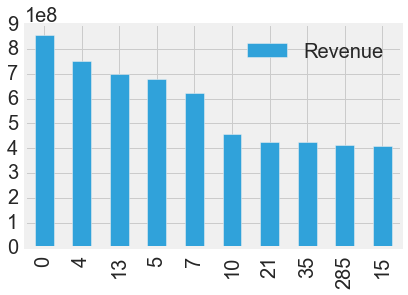

In [161]:
#We sorted by Revenue and returned the title of the movie with the lowest generated revenue.

sci_fi_df[['Title', 'Revenue']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False).head(10).plot(kind='bar')

What scifi film has the lowest rated review?

Testament

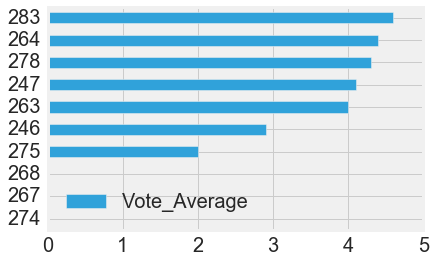

In [148]:
#We sorted by Vote_Average and returned the title of the movie with the lowest rating.

sci_fi_df[['Title', 'Vote_Average']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Vote_Average',ascending=True).head(10).plot(kind='barh')

tbd

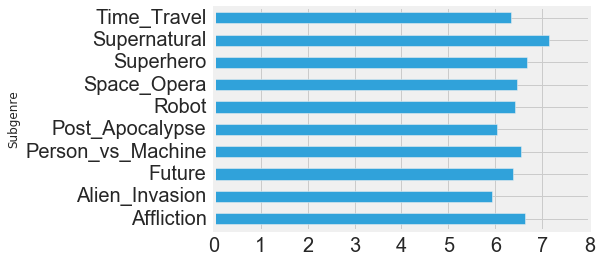

In [149]:
#subgenre by vote average plot -alison, look into something else

sci_fi_df.groupby('Subgenre')['Vote_Average'].mean().plot(kind='barh')
plt.show()

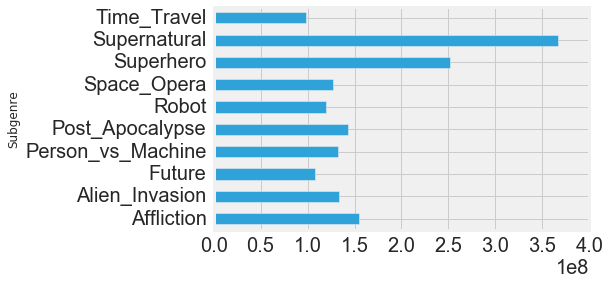

In [150]:
#subgenre by revenue plot -alison

sci_fi_df.groupby('Subgenre')['Revenue'].mean().plot(kind='barh')
plt.show()

Distribution

In [184]:
#sci_fi_df['Revenue'] = round(sci_fi_df['Revenue']/1000000, 2)

In [185]:
#sci_fi_df[['Revenue','Title']]

In [240]:
print('Median: $', round(sci_fi_df.drop_duplicates(subset='Title')['Revenue'].mean()/1000000),'Million')
print('Mean: $',round(sci_fi_df.drop_duplicates(subset='Title')['Revenue'].median()/1000000),'Million')

Median: $ 138 Million
Mean: $ 91 Million


In [228]:
mean = sci_fi_df.drop_duplicates(subset='Title')['Revenue'].mean()
median = sci_fi_df.drop_duplicates(subset='Title')['Revenue'].median()

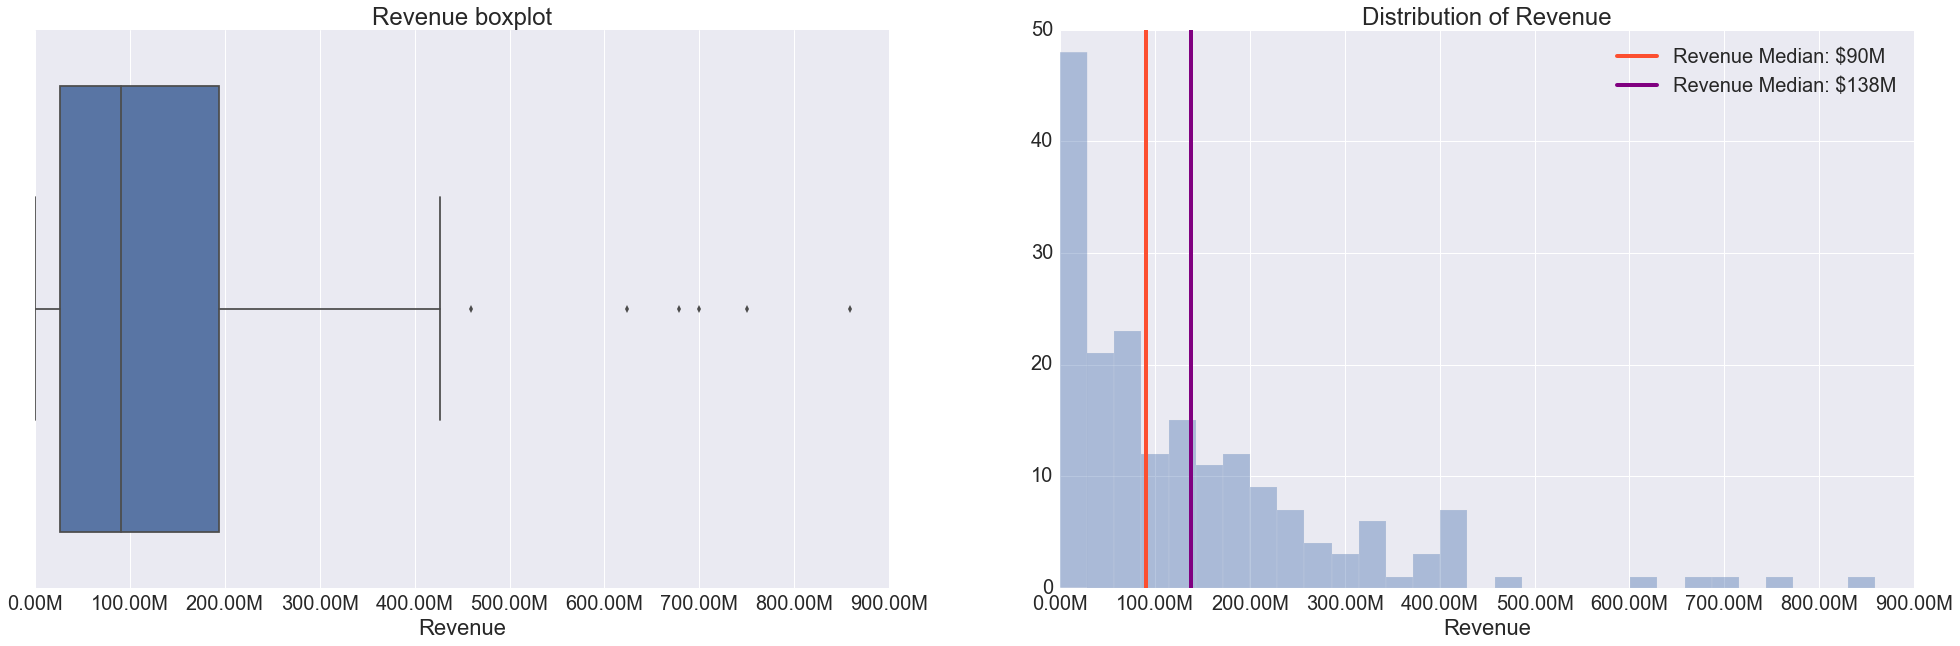

In [231]:
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(30,10))
sns.set(font_scale=2)
sns.set_style("darkgrid")


sns.distplot(sci_fi_df.drop_duplicates(subset='Title')['Revenue'], bins=30, ax=ax2, kde=False).set_title('Distribution of Revenue')

sns.boxplot(sci_fi_df.drop_duplicates(subset='Title')['Revenue'], ax=ax).set_title('Revenue boxplot')

color ='#fc4f30'
plt.axvline(median, color=color, label='Revenue Median: $90M', linewidth=4)  #median line
plt.axvline(mean, color='purple', label='Revenue Median: $138M', linewidth=4)
plt.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.show()


Relationship and Correlation

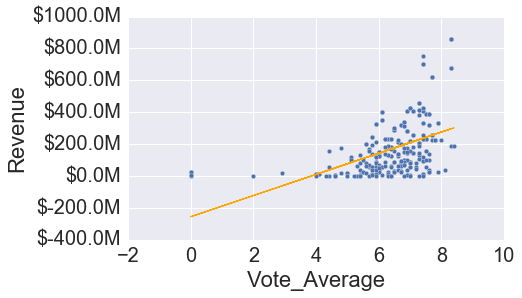

In [198]:
w = sci_fi_df.plot(kind='scatter',x='Vote_Average',y='Revenue')

m,b=np.polyfit(sci_fi_df['Vote_Average'], sci_fi_df['Revenue'], 1)
plt.plot(sci_fi_df['Vote_Average'], m*sci_fi_df['Vote_Average'] + b, linewidth = 1, color='orange')

w.yaxis.set_major_formatter(formatter)

plt.show()

In [28]:
sci_fi_df['Revenue'].corr(sci_fi_df['Vote_Average'])

0.47456555419442137

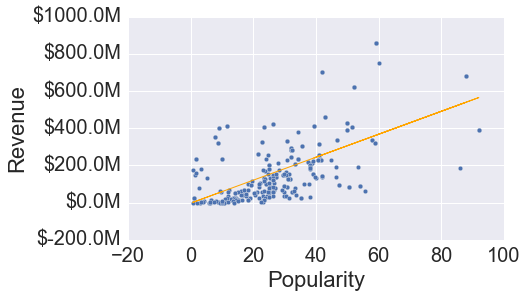

In [199]:
#What is the correlation of revenue and popularity? -Jude
#Popularity has a higher correlation with revenue 

y = sci_fi_df.plot(kind='scatter',x='Popularity',y='Revenue')

m,b=np.polyfit(sci_fi_df['Popularity'], sci_fi_df['Revenue'], 1)
plt.plot(sci_fi_df['Popularity'], m*sci_fi_df['Popularity'] + b, linewidth = 1, color='orange')

y.yaxis.set_major_formatter(formatter)

plt.show()

In [17]:
#Correlation between Revenue and Popularity -Jude

sci_fi_df['Revenue'].corr(sci_fi_df['Popularity'])

0.58841133208579954

## Top 10 Sci Fi Movies

<Container object of 10 artists>

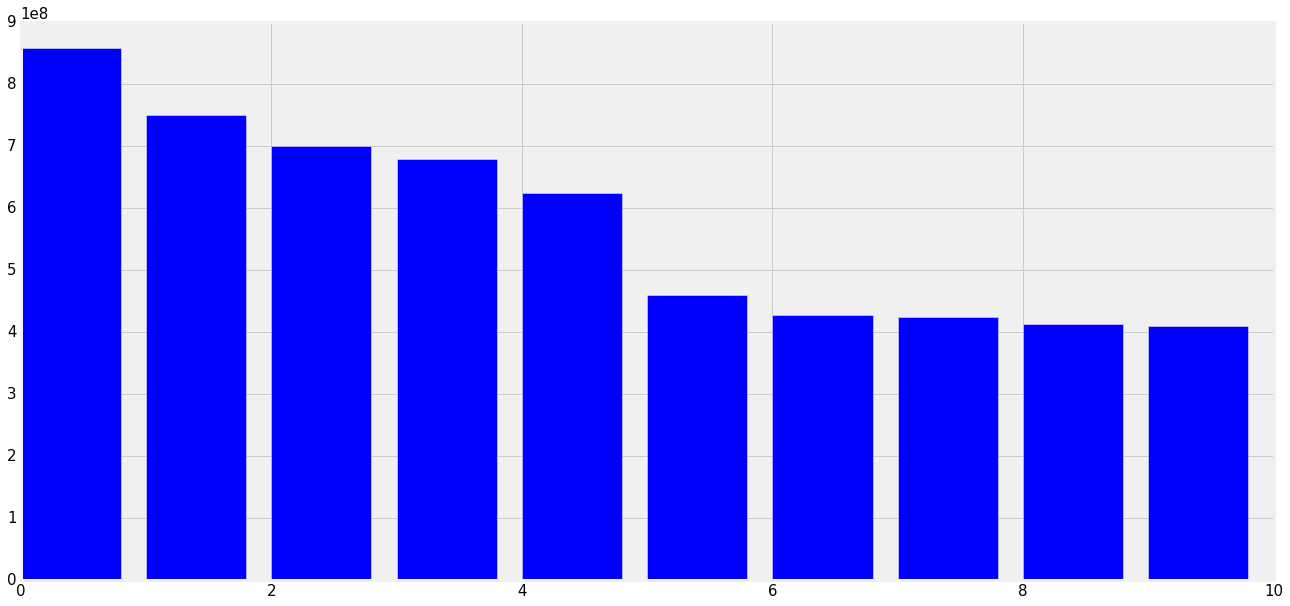

In [24]:
#top 10 sci fi movies -Alison

top_10=sci_fi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False)['Title'].head(10)

top_10_revenue=sci_fi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False)['Revenue'].head(10)

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

plt.bar(range(len(top_10)),top_10_revenue)
#xticks('sample', 'movie')


In [ ]:
#What is the distribution like? <-Jude 

In [ ]:
#Are there any outliers? <-Jude 


In [ ]:
#fig5, (ax5,ax6) = plt.subplots(ncols=2, figsize=(30,10)) #ax5=All_but_supernatural_data['Revenue'].plot(kind='bar',grid=False,color='orange')
#ax5.set_title('Comparing Average Revenue by Subgenre',fontdict={'size':16})
#ax5.set_ylabel('Average Revenue ($)',fontdict={'size':14})
#ax5.yaxis.set_major_formatter(formatter)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)final_fig=plt.bar(final2, final)
plt.title('Most Popular Languages')
#plt.ylabel('Programming Languages')
plt.xlabel('Number of People Who Use')
plt.grid(True)
plt.tight_layout()
plt.yticks(np.arange(5), ('$100M', '$200M', '$300M', '$400M', '$500M'))
#final_fig.yaxis.set_major_formatter(formatter)
plt.show()

In [ ]:
All_but_supernatural_data=scifi_df[scifi_df['Subgenre']!= 'Supernatural']supernatural_data=scifi_df[scifi_df['Subgenre']== 'Supernatural']Super_rev_mean=supernatural_data['Revenue'].mean()/1000000All_mean=All_but_supernatural_data['Revenue'].mean()/1000000

In [ ]:
final=[Super_rev_mean,All_mean]
final2=['Super_rev_mean','All_mean']

## Final Thoughts & Summary:

In [ ]:
#Overall suggestion and final thoughts to Microsoft?
